In [9]:
import json 
import matplotlib
from matplotlib import patches
from matplotlib import pyplot as plt
import pickle
import pandas as pd

In [10]:
data_path = '../../'
data = pd.read_csv('../../data/raw-data/filtered_everything.csv', index_col=0)

In [14]:
print(data.sort_values(by='COF').head(500)['COF'].min())
print(data.sort_values(by='COF').head(500)['COF'].max())


0.0737549238333333
0.11391470845


In [15]:
print(data.sort_values(by='intercept').head(500)['intercept'].min())
print(data.sort_values(by='intercept').head(500)['intercept'].max())

0.0074703459
0.5406461831333335


In [3]:
from numpy import *
from matplotlib.pyplot import *

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.it'] = 'DejaVu Sans:italic'
rcParams['mathtext.bf'] = 'DejaVu Sans:italic:bold'


In [4]:
n = 500
poi = ['terminal_group_1', 
       'terminal_group_2',
       'terminal_group_3',
       'frac-1', 'frac-2',
       'COF', 'COF-std',
       'intercept', 'intercept-std']
topCOF = data.sort_values(by='COF')[poi]
topF0 = data.sort_values(by='intercept')[poi]
optimal = pd.merge(topCOF.head(n), topF0.head(n), how='inner',
                     on=poi)

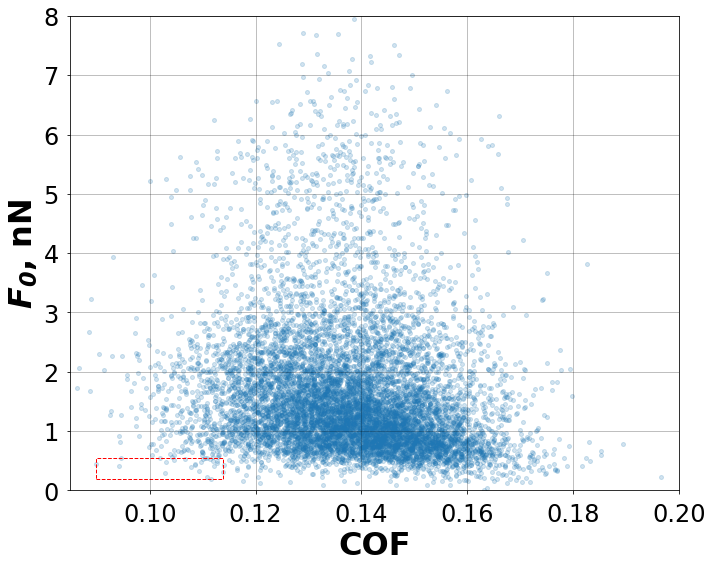

In [8]:
index = list()
cof = list()
f0 = list()
for i, row in data.iterrows():
    index.append(i)
    cof.append(row['COF'])
    f0.append(row['intercept'])
    
plt.figure(figsize=(10, 8))
alpha = 0.2 


rect = patches.Rectangle(xy=(optimal['COF'].min(), optimal['intercept'].min()),
                         width=optimal['COF'].max() - optimal['COF'].min(), 
                         height=optimal['intercept'].max() - optimal['intercept'].min(),
                         edgecolor='r',
                         linewidth=1,
                         linestyle='--',
                         facecolor='none')
#plt.title('F$_0$ vs COF', fontsize=20)
plt.gca().add_patch(rect)
plt.ylabel(r'$\mathbf{F_0}$, nN', weight='bold')
plt.xlabel('COF', weight='bold')
plt.scatter(cof, f0, alpha=alpha, marker='.')

plt.xlim(0.085, 0.20)
plt.ylim(0, 8)
plt.savefig(fname=f'./plots/dist/complete_COF_vs_F0(top{len(optimal)}).pdf', dpi=500)

In [ ]:
index = list()
cof = list()
f0 = list()
for i, row in data.iterrows():
    if row['COF'] <= optimal['COF'].max() and row['intercept'] <= optimal['intercept'].max():
        index.append(i)
        cof.append(row['COF'])
        f0.append(row['intercept'])
        
condensed_data = data.loc[index]

condensed_data = condensed_data[['terminal_group_1','terminal_group_2',
                                 'terminal_group_3', 'frac-1','frac-2',
                                 'backbone','COF','COF-std',
                                 'intercept', 'intercept-std']]
condensed_data.to_csv(f'./plots/opt_sys{len(condensed_data)}_raw.csv')


renamed_cdata = condensed_data.rename(columns={'terminal_group_1': 'Terminal Group A',
                       'terminal_group_2': 'Terminal Group B',
                       'terminal_group_3': 'Terminal Group C',
                       'frac-1': 'Fraction A',
                       'frac-2': 'Fraction B',
                       'backbone': 'Backbone',
                       'COF': 'COF',
                       'COF-std': 'COF-std',
                       'intercept': 'F$_0$',
                       'intercept-std': 'F$_0$-std'})
renamed_cdata.index = range(1, len(renamed_cdata)+1)

#renamed_cdata.to_csv(f'./plots/opt_sys{len(renamed_cdata)}.csv')

# Histogram - Distribution

### Everything Dataset

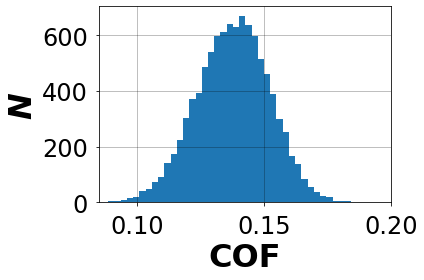

In [6]:
plt.hist(data['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N', style='italic')

plt.xlim(0.085, 0.2)
plt.savefig(fname='./plots/dist/COF_hist.pdf', dpi=500)

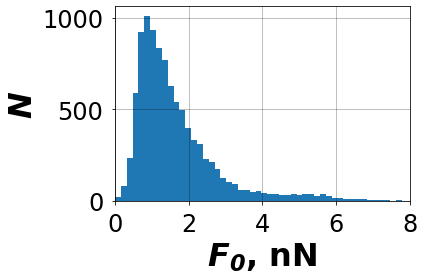

In [7]:
plt.hist(data['intercept'], bins=50)
plt.xlabel(r'$\mathbf{F_0}$, nN')
plt.ylabel('N', style='italic')

plt.xlim(0, 8)
plt.savefig(fname='./plots/dist/F0_hist.pdf', dpi=500)

### Combined Test set 

In [ ]:
combined_test = pd.read_csv('../../data/splitted-data/everything/nbins-10/test_set.csv', index_col=0)


In [ ]:
plt.hist(combined_test['COF'], bins=50)
plt.xlabel('COF')
plt.ylabel('N')
#plt.savefig(fname='./plots/COF_hist.pdf', dpi=500)

In [ ]:
plt.hist(combined_test['intercept'], bins=50)
plt.xlabel('F$_0$ (nN)')
plt.ylabel('N')
#plt.savefig(fname='./plots/F0_hist.pdf', dpi=500)

# Distribution of Training data

In [ ]:
# Original 100 
og = pd.read_csv('../../data/raw-data/original-100.csv', index_col=0)
m5050_100 = pd.read_csv('../../data/splitted-data/mixed5050/nbins-10/set_0/COF_1000.csv')
eve_100 = pd.read_csv('../../data/splitted-data/everything/nbins-10/set_0/COF_1000.csv')


In [ ]:
plt.figure(figsize=[10, 8])
plt.hist([og['COF'], m5050_100['COF'], eve_100['COF']],
         bins=20, 
         label=['og', 'm5050', 'eve'])
plt.xlabel('COF')
plt.ylabel('N')
plt.legend()

In [ ]:
plt.figure(figsize=[10, 8])
plt.hist([og['intercept'], m5050_100['intercept'], eve_100['intercept']],
         bins=20, 
         label=['og', 'm5050', 'eve'])
plt.xlabel('F0')
plt.ylabel('N')
plt.legend()